##CNN Model

Importing libraries

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Set up the dataset and data augmentation

In [14]:
# Define the path to your train folder containing three sub-folders (one for each class).
train_path = 'train'

# Set up data augmentation to improve the model's performance and prevent overfitting.

datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values between 0 and 1
    rotation_range=20,    # Randomly rotate images within 20 degrees
    width_shift_range=0.1,  # Randomly shift the width of images by 10%
    height_shift_range=0.1,  # Randomly shift the height of images by 10%
    shear_range=0.2,       # Shear transformation
    zoom_range=0.2,        # Randomly zoom in images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'    # Fill missing pixels with the nearest value
)

# Load and augment the images from the train directory.
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),  # Resize the images to 150x150 pixels
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)


Found 251 images belonging to 3 classes.


Create the CNN model

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(3, activation='softmax')  # 3 classes
])

Compile the model

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Train the model

In [20]:
epochs = 10
model.fit(train_generator, epochs=epochs)


Epoch 1/10
8/8 [==============================] - 10s 725ms/step - loss: 1.6874 - accuracy: 0.3347
Epoch 2/10
8/8 [==============================] - 5s 692ms/step - loss: 1.0312 - accuracy: 0.5339
Epoch 3/10
8/8 [==============================] - 6s 719ms/step - loss: 0.8563 - accuracy: 0.6295
Epoch 4/10
8/8 [==============================] - 7s 857ms/step - loss: 0.6388 - accuracy: 0.7131
Epoch 5/10
8/8 [==============================] - 6s 667ms/step - loss: 0.5930 - accuracy: 0.7689
Epoch 6/10
8/8 [==============================] - 6s 696ms/step - loss: 0.4907 - accuracy: 0.7968
Epoch 7/10
8/8 [==============================] - 6s 808ms/step - loss: 0.6109 - accuracy: 0.7530
Epoch 8/10
8/8 [==============================] - 6s 754ms/step - loss: 0.5631 - accuracy: 0.7809
Epoch 9/10
8/8 [==============================] - 7s 917ms/step - loss: 0.5650 - accuracy: 0.7530
Epoch 10/10
8/8 [==============================] - 5s 684ms/step - loss: 0.4694 - accuracy: 0.8088


Save the model as an .h5 file after training

In [21]:
model.save('trained_model.h5')


Load the model and print the summary

In [22]:
from tensorflow.keras.models import load_model

loaded_model = load_model('trained_model.h5')
print(loaded_model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Plot the loss and accuracy graph during training

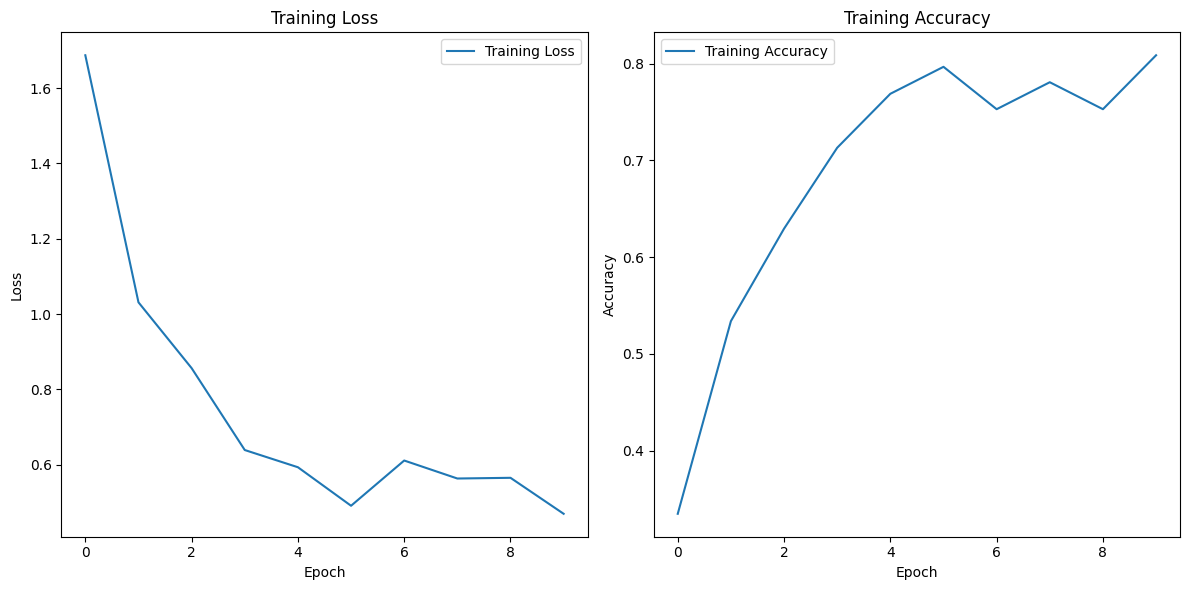

In [23]:
import matplotlib.pyplot as plt

# Access the history object that was returned after training the model
history = model.history

# Plot the loss and accuracy during training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


##RCNN Models

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [3]:

import torch
import torchvision
from torchvision.transforms import Compose, ToTensor, Resize, CenterCrop
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Data preparation and transformation
def load_and_resize_image(image, size=(256, 256)):
    return torchvision.transforms.functional.resize(image, size)

transform = Compose([ToTensor(), load_and_resize_image])
train_dataset = ImageFolder('train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# If you want to check the class names and the corresponding indices:
print(train_dataset.classes)
print(train_dataset.class_to_idx)

# Example of accessing an image and its label
for images, labels in train_loader:
    print(images.shape)  # Should be (batch_size, channels, height, width)
    print(labels)        # Tensor containing class indices (0, 1, or 2 in your case)
    break


['Covid', 'Normal', 'Viral Pneumonia']
{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([4, 3, 256, 256])
tensor([0, 2, 1, 2])


VGG16 Model fine tuning

Epoch 1/5, Loss: 0.8054, Accuracy: 0.6534
Epoch 2/5, Loss: 0.5790, Accuracy: 0.7649
Epoch 3/5, Loss: 0.3585, Accuracy: 0.8725
Epoch 4/5, Loss: 0.1717, Accuracy: 0.9442
Epoch 5/5, Loss: 0.1001, Accuracy: 0.9482


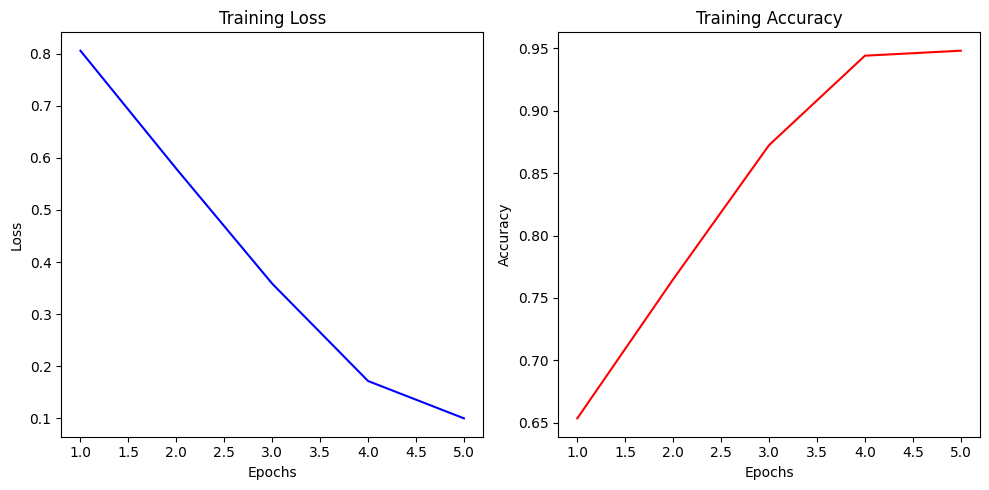

In [5]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, ToTensor, Resize, CenterCrop
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.models import vgg16

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data preparation and transformation
def load_and_resize_image(image, size=(256, 256)):
    image = torchvision.transforms.functional.resize(image, size)
    return image.to(device)

transform = Compose([ToTensor(), load_and_resize_image])
train_dataset = ImageFolder('train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Load the VGG-16 model
model = vgg16(pretrained=True)

# Modify the model to match the number of classes in your dataset
num_classes = len(train_dataset.classes)
model.classifier[-1] = torch.nn.Linear(4096, num_classes)

# Move the model to the GPU if available
if torch.cuda.is_available():
    model = model.to(device)

# Set up the optimizer and the learning rate scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Define the loss function
criterion = torch.nn.CrossEntropyLoss()

# Fine-tune the model
num_epochs = 5  # You can adjust this according to your needs

losses = []
accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

    lr_scheduler.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# Save the fine-tuned model as .h5
torch.save(model.state_dict(), 'vgg16.pth')

# Plot Loss and Accuracy Graphs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), losses, 'b-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()


MibleNet RCNN Fine tuning

Epoch 1/10, Loss: 0.6901, Accuracy: 0.7211
Epoch 2/10, Loss: 0.4085, Accuracy: 0.8287
Epoch 3/10, Loss: 0.3127, Accuracy: 0.8845
Epoch 4/10, Loss: 0.2667, Accuracy: 0.8964
Epoch 5/10, Loss: 0.2488, Accuracy: 0.9004
Epoch 6/10, Loss: 0.2400, Accuracy: 0.9084
Epoch 7/10, Loss: 0.2609, Accuracy: 0.9004
Epoch 8/10, Loss: 0.2123, Accuracy: 0.9283
Epoch 9/10, Loss: 0.1791, Accuracy: 0.9363
Epoch 10/10, Loss: 0.1832, Accuracy: 0.9402


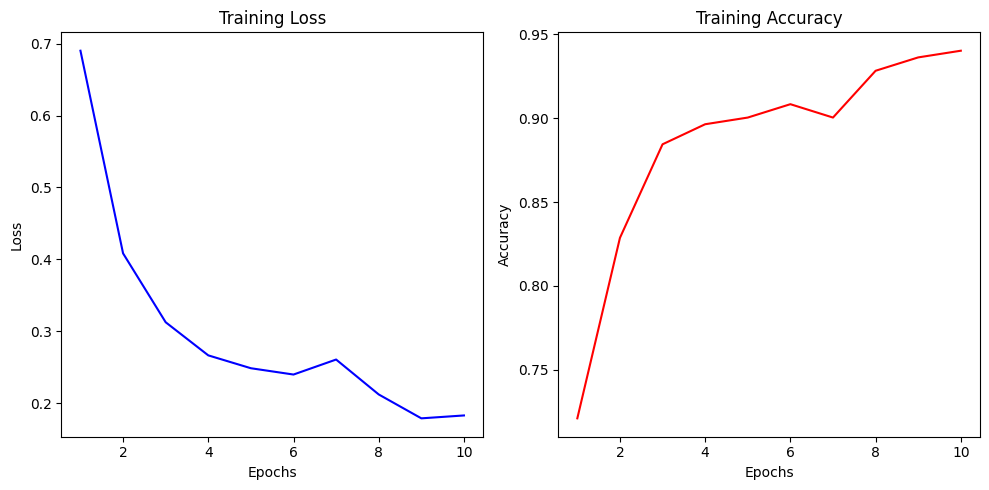

In [9]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, ToTensor, Resize, CenterCrop
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.models import mobilenet_v2

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data preparation and transformation
def load_and_resize_image(image, size=(256, 256)):
    return torchvision.transforms.functional.resize(image, size)

transform = Compose([ToTensor(), load_and_resize_image])
train_dataset = ImageFolder('train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Load the MobileNetV2 model and move it to the GPU
model = mobilenet_v2(pretrained=True).to(device)

# Modify the model to match the number of classes in your dataset
num_classes = len(train_dataset.classes)
model.classifier[1] = torch.nn.Linear(1280, num_classes).to(device)

# Set up the optimizer and the learning rate scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Define the loss function
criterion = torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 10  # You can adjust this according to your needs
losses = []
accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

    lr_scheduler.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# Save the fine-tuned model as .h5
torch.save(model.state_dict(), 'mobilenet_v2.pth')

# Plot Loss and Accuracy Graphs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), losses, 'b-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()


VGG16 & Mobilenet_v2 Comparision

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


MobileNetV2 Accuracy: 0.9393939393939394
MobileNetV2 Average Loss: 0.13758531730512485
VGG16 Accuracy: 0.9848484848484849
VGG16 Average Loss: 0.129247362157912


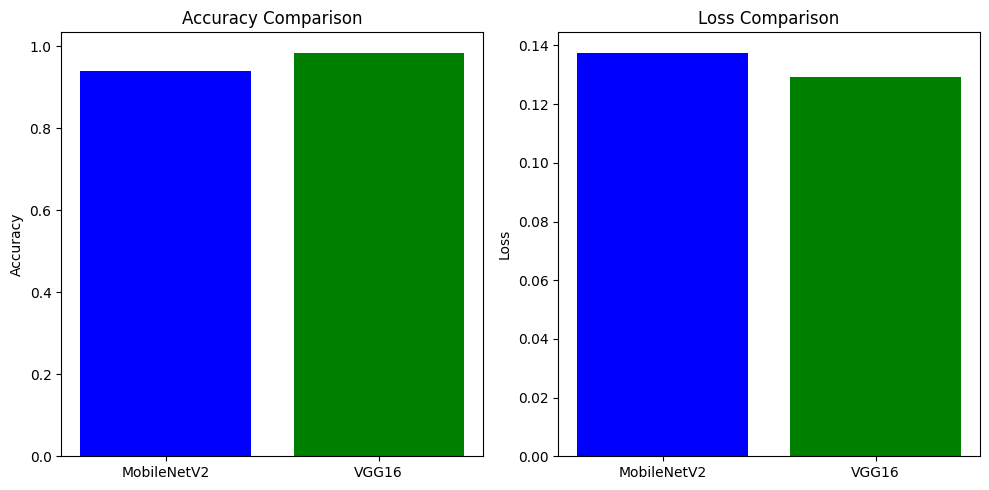

In [10]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, ToTensor, Resize, CenterCrop
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.models import mobilenet_v2, vgg16

# Data preparation and transformation
def load_and_resize_image(image, size=(256, 256)):
    return torchvision.transforms.functional.resize(image, size)

transform = Compose([ToTensor(), load_and_resize_image])
test_dataset = ImageFolder('test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Load the saved MobileNetV2 model
model_mobilenet = mobilenet_v2(pretrained=False)
num_classes = len(test_dataset.classes)
model_mobilenet.classifier[1] = torch.nn.Linear(1280, num_classes)
model_mobilenet.load_state_dict(torch.load('mobilenet_v2.pth'))
model_mobilenet.eval()

# Load the saved VGG16 model
model_vgg16 = vgg16(pretrained=False)
num_classes = len(test_dataset.classes)
model_vgg16.classifier[-1] = torch.nn.Linear(4096, num_classes)
model_vgg16.load_state_dict(torch.load('vgg16.pth'))
model_vgg16.eval()

# Evaluate the models on the test dataset
def evaluate_model(model):
    correct_predictions = 0
    total_predictions = 0
    total_loss = 0.0
    criterion = torch.nn.CrossEntropyLoss()

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

    accuracy = correct_predictions / total_predictions
    average_loss = total_loss / len(test_loader)
    return accuracy, average_loss

accuracy_mobilenet, loss_mobilenet = evaluate_model(model_mobilenet)
accuracy_vgg16, loss_vgg16 = evaluate_model(model_vgg16)

print("MobileNetV2 Accuracy:", accuracy_mobilenet)
print("MobileNetV2 Average Loss:", loss_mobilenet)
print("VGG16 Accuracy:", accuracy_vgg16)
print("VGG16 Average Loss:", loss_vgg16)

# Plot Loss and Accuracy Comparison Graphs
models = ['MobileNetV2', 'VGG16']
accuracies = [accuracy_mobilenet, accuracy_vgg16]
losses = [loss_mobilenet, loss_vgg16]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.subplot(1, 2, 2)
plt.bar(models, losses, color=['blue', 'green'])
plt.ylabel('Loss')
plt.title('Loss Comparison')

plt.tight_layout()
plt.show()
